In [25]:
# Part 2 - EDA

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/thomassimmons/Coding/SS/data/Superstore_cleaned.csv")

In [26]:
# Basic description
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (9993, 20)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9993 non-null   object 
 2   Ship Date      9993 non-null   object 
 3   Ship Mode      9993 non-null   object 
 4   Customer ID    9993 non-null   object 
 5   Customer Name  9993 non-null   object 
 6   Segment        9993 non-null   object 
 7   Country        9993 non-null   object 
 8   City           9993 non-null   object 
 9   State          9993 non-null   object 
 10  Postal Code    9993 non-null   int64  
 11  Region         9993 non-null   object 
 12  Product ID     9993 non-null   object 
 13  Category       9993 non-null   object 
 14  Sub-Category   9993 non-null   object 
 15  Product Name   9993 non-null   object 
 16  Sales          9993 non-null   float64
 17  Quantity       9993 non-null   int64  
 18  Discount

In [29]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [30]:
# More in-depth description
df.describe(include='all')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993.000000,9993,9993,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
unique,5009,1237,1334,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,CA-2017-100111,2016-09-05,2015-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,14,38,35,5967,37,37,5191,9993,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55191.576403,NaN,NaN,NaN,NaN,NaN,229.852846,3.789753,0.156188,28.660971
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32065.074478,NaN,NaN,NaN,NaN,NaN,623.276074,2.225149,0.206457,234.271476
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.731000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56560.000000,NaN,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.671000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [31]:
# New column
df['Total Sales'] = df['Quantity'] * df['Sales']
df['Total Sales']

0        523.9200
1       2195.8200
2         29.2400
3       4787.8875
4         44.7360
          ...    
9988      75.7440
9989     183.9200
9990     517.1520
9991     118.4000
9992     486.3200
Name: Total Sales, Length: 9993, dtype: float64

<Axes: title={'center': 'Revenue by Category'}, ylabel='Category'>

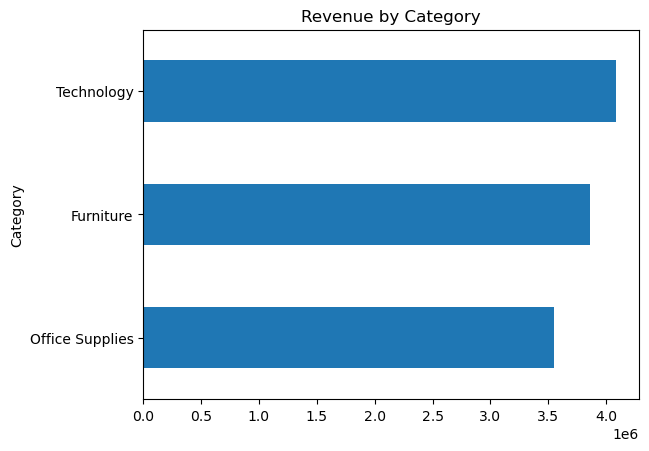

In [32]:
# Plotting revenue by category
category_sales = df.groupby('Category')['Total Sales'].sum().sort_values()
category_sales.plot(kind = 'barh', title = 'Revenue by Category')

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Order Date'>

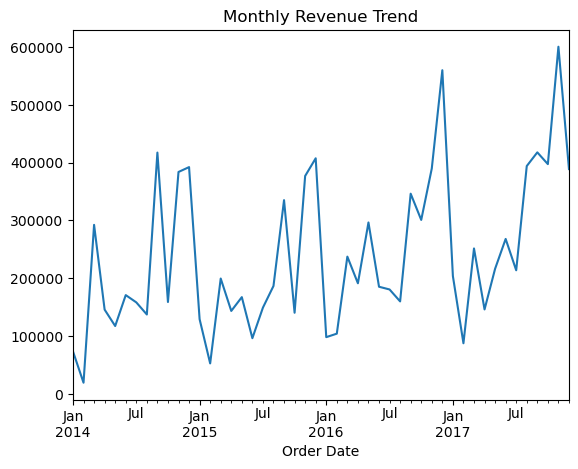

In [33]:
# Finding monthly revenue trends
df['Order Date'] = pd.to_datetime(df['Order Date']) 
monthly = df.groupby(df['Order Date'].dt.to_period('M'))['Total Sales'].sum()
monthly.index = monthly.index.to_timestamp()  
monthly.plot(title='Monthly Revenue Trend')

<Axes: title={'center': 'Top 10 Products by Sales'}, xlabel='Product Name'>

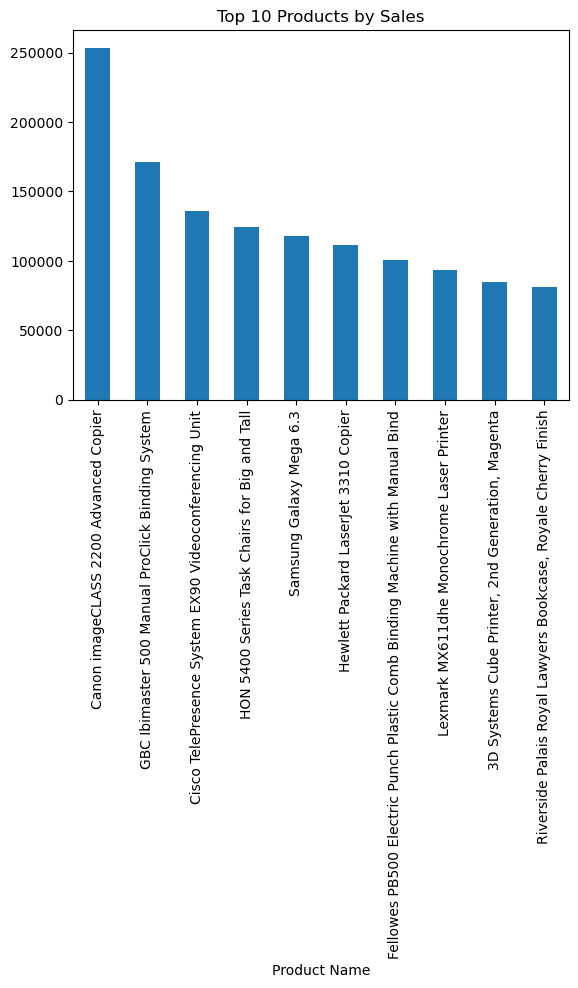

In [34]:
# Top 10 products by sales
top_products = df.groupby('Product Name')['Total Sales'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales')

<Axes: title={'center': 'Sales Distribution by Region'}, ylabel='Total Sales'>

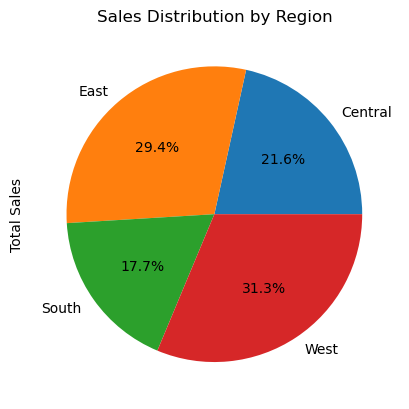

In [35]:
# Sales by region
region_sales = df.groupby('Region')['Total Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Region')

<Axes: xlabel='Segment'>

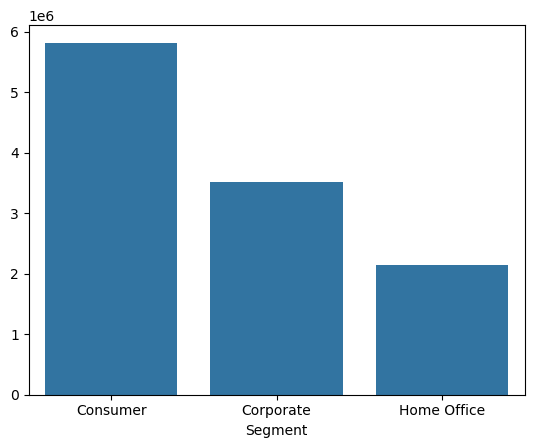

In [36]:
# Customer Segments
segment_sales = df.groupby('Segment')['Total Sales'].sum()
sns.barplot(x=segment_sales.index, y=segment_sales.values)